# Differentiaalvergelijkingen

## Inleiding

Dit notebook behandelt een inleiding op differentiaalvergelijkingen in Sympy. Voor je eraan begint, moet je hoofdstukken 2, 3, 4, 5 en 7 van het handboek *Calculus, a complete course* (Robert A. Adams & Christopher Essex) doornemen.

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

## Differentiaalvergelijkingen van eerste orde oplossen met Sympy

We illustreren eerst de werkwijze om differentiaalvergelijkingen op te lossen met Sympy. Beschouw de vergelijking:
$$\frac{dy}{dx} = x y.$$
Deze vergelijking kan opgelost worden door *scheiding van veranderlijken* omdat het rechterlid een product is van een functie van $x$ en een functie van $y$. We schrijven de vergelijking daartoe in de volgende vorm:
$$\frac{1}{y}\,dy = x\,dx.$$
Dan integreren we beide leden van deze vergelijking (het linkerlid naar $y$ en het rechterlid naar $x$), dus
$$\int \frac{1}{y}\,dy = \int x\,dx$$
Na een beetje integratiewerk komen we uit op de gelijkheid
$$\ln\left(\left|y\right|\right) = \frac{x^2}{2}+C_1$$
waarbij $C_1$ een willekurige integratieconstante voorstelt. Als we deze vorige vergelijking exponentiëren, vinden we als oplossing
$$\left|y\right|=e^{\frac{x^2}{2}+C_1}$$
ofwel
$$y=C_2e^{\frac{x^2}{2}}$$
waarbij $C_2=\pm e^{C_1}$. Deze vergelijking is de *algemene oplossing* van de gegeven differentiaalvergelijking.

Je kan makkelijk nagaan dat de gevonden algemene oplossing $y=C_2e^{\frac{x^2}{2}}$ inderdaad voldoet aan de differentiaalvergelijking. Als we ze afleiden naar $x$ vinden we namelijk
$$
\begin{aligned}
\frac{dy}{dx} &= C_2e^{\frac{x^2}{2}} \frac{d}{dx}\left[\frac{x^2}{2}\right]\\
&=x C_2e^{\frac{x^2}{2}} = xy
\end{aligned}
$$

Stel nu dat er een *beginvoorwaarde* opgegeven is: $y\left(0\right)=1$, met andere woorden, $y=1$ als $x=0$.
Als we deze beginvoorwaarde opleggen, kunnen we de constante $C_2$ bepalen. We vinden dan dat $C_2=1$ en een *particuliere oplossing* is dus
$$ y=e^{\frac{x^2}{2}}.$$

Hieronder een plot van de oplossing.

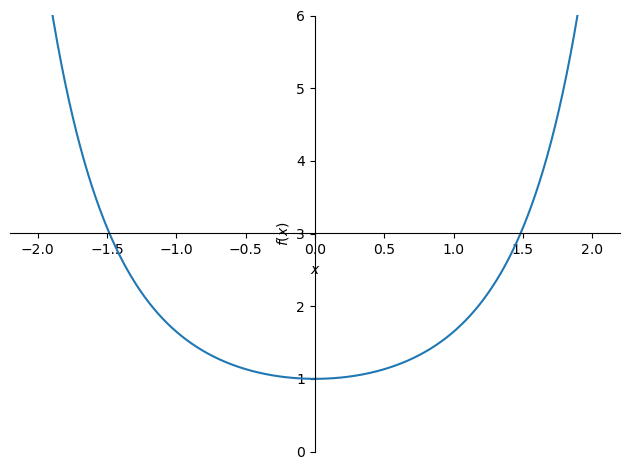

In [2]:
x = sp.symbols('x')
sp.plot(sp.exp((x**2)/2), (x, -2, 2), ylim=(0, 6))

We gaan nu beschrijven hoe je dit proces kan automatiseren in Sympy. Eerst moeten we de differentiaalvergelijking zelf ingeven. De differentiaalvergelijking $\frac{dy}{dx}=xy$ kan in de vorm $\frac{d}{dx}y\left(x\right)=xy\left(x\right)$ geschreven worden. Deze vorm kan als volgt  in SymPy ingegeven worden:

In [3]:
y = sp.Function('y')
dfvgl = sp.Eq(sp.Derivative(y(x), x),x*y(x))
display(dfvgl)

Eq(Derivative(y(x), x), x*y(x))

Wat hebben we in bovenstaande code gedaan? We hebben eerst de variabele `y` als functie gebruikt door `Function` aan te roepen. Vervolgens hebben we de functie `Eq` gebruikt. Deze functie kan je gebruiken om gelijkheden weer te geven. Je moet twee argumenten meegeven aan `Eq` en dit zijn het linkerlid en het rechterlid van de gelijkheid. We slaan deze gelijkheid op in `dfvgl`. Door dit object weer te geven kan je dan de gelijkheid zien op je scherm. Wil je het linkerlid van de gelijkheid dan gebruik je de operatie `lhs` (left-hand side). Voor het rechterlid gebruik je dan `rhs` (right-hand side)

In [4]:
display(dfvgl.lhs)
display(dfvgl.rhs)

Derivative(y(x), x)

x*y(x)

Sympy kan de algemene oplossing van deze differentiaalvergelijking meteen vinden via het commando `dsolve`. Je geeft aan `dsolve` gewoon de gelijkheid mee samen met de functie waarnaar je wilt oplossen.

In [12]:
sol = sp.dsolve(dfvgl, y(x))
display(sol)

Eq(y(x), C1*exp(x**2/2))

Om de differentiaalvergelijking op te lossen met de beginvoorwaarde $y\left(0\right)=1$, moeten er enige manoeuvres plaatsvinden. We zullen eerst de integratieconstante bepalen door de beginvoorwaarde in te laten vullen in de algemene oplossing. We vragen Sympy dus om de vergelijking $1 = C_1 e^\frac{0^2}{2}$ op te lossen naar $C_1$.

In [18]:
# de beginvoorwaarde is y(x0) = y0 met x0 = 0 en y0 = 1
x0 = 0 
y0 = 1
out = sp.solve(sp.Eq(y0, sol.rhs.subs(x, x0)))
display(out)

[1]

De code werkt als volgt. Het object `C1` is zelf een gelijkheid. We hebben dus enkel het rechterlid hiervan nodig. In dit rechterlid vullen we dan voor $x$ de waarde $0$ in. Hierdoor komen we aan het stuk code
`sol.rhs.subs(x, x0)`.
Door met `Eq` te werken, kunnen we dit gelijkstellen aan $y_0$ (oftewel $1$) en door de functie `solve` jagen. Waar `dsolve` gebruikt wordt om differentiaalvergelijkingen op te lossen, kunnen we `solve` gebruiken om "gewone" gelijkheden op te lossen. Het resultaat van `solve` is een lijst met oplossingen. Voor een heel grote variëteit van differentiaalvergelijkingen geldt de stelling van *uniciteit van de particuliere oplossing*. Dit wil zeggen dat voor deze differentiaalvergelijkingen er maar één oplossing is voor iedere beginvoorwaarde. Daarom vinden we als oplossing een lijst met één element (namelijk $1$). We willen deze enige oplossing gebruiken, en moeten die substitueren in de oorspronkelijke oplossing van de differentiaalvergelijking. Hiervoor moeten we opnieuw een symbool aanmaken om de integratieconstante te kunnen voorstellen

In [19]:
C1 = sp.symbols('C1')
opl = sol.subs(C1, out[0])
display(opl)

Eq(y(x), exp(x**2/2))

Nu we de oplossing hebben, kunnen we deze op dezelfde manier plotten als we in het begin gedaan hebben. We moeten echter wel specifiëren dat we het rechterlid willen plotten, dus:

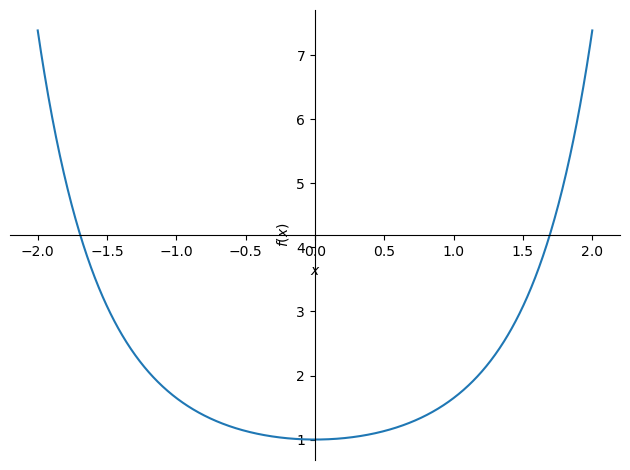

In [20]:
sp.plot(opl.rhs, (x, -2, 2))

**Opdracht 1:** Los de differentiaalvergelijking $y'(x) = \frac{y}{x^2}$ met beginvoorwaarde $y(1) = \frac{1}{e}$ op via Sympy.

In [28]:
vgl = sp.Eq(sp.Derivative(y(x), x), y(x)/(x**2))
vgl

Eq(Derivative(y(x), x), y(x)/x**2)

In [30]:
sol = sp.dsolve(vgl, y(x))
sol

Eq(y(x), C1*exp(-1/x))

In [43]:
x0 = 1
y0 = 1/sp.exp(1)

c0 = sp.solve(sp.Eq(y0, sol.rhs.subs(x, x0)))
opl = sol.subs(C1, c0[0])
opl

Eq(y(x), exp(-1/x))

## Beginwaardeprobleem automatisch oplossen

De bovenstaande methode wordt vrij omslachtig indien we met iets ingewikkeldere differentiaalvergelijkingen beginnen te werken. Gelukkig kan Sympy automatisch een differentiaalvergelijking met beginvoorwaarde oplossen (vanaf Sympy versie 1.2). Nu beschouwen we opnieuw het beginwaardeprobleem uit het inleidende voorbeeld, namelijk $\frac{d}{dx}y\left(x\right)=xy\left(x\right)$ met $y(0)=1$. Onderstaande code berekent de particuliere oplossing van deze DVG.

In [48]:
y = sp.Function('y')
dfvgl = sp.Eq(sp.Derivative(y(x), x),x*y(x))

bvw = {y(0): 1}

sol = sp.dsolve(dfvgl, y(x), ics=bvw)
display(sol)

Eq(y(x), exp(x**2/2))

Meerdere beginvoorwaarden (voor hogere-orde differentiaalvergelijkingen, zie verder in dit werkblad) invoeren om meerdere integratieconstanten expliciet te bepalen kan ook. Om de beginvoorwaarden $y(x_0) = x_1, \, y'(x_2) = x_3$ mee te geven gebruik je `bvw = {y(x0): x1, y(x).diff(x).subs(x, x2): x3}`.

**Opmerking:** Soms kan het voorkomen dat Sympy de beginvoorwaarde niet zelf kan invullen in de algemene oplossing. Een mogelijke reden hiervoor is dat er meerdere, kwalitatief verschillende, oplossingen van de differentiaalvergelijking bestaan (na herschrijven in de vorm $y=f(x)$ ) zoals bij de differentiaalvergelijking $y'(x) = \frac{x}{y}$ met y(0) = 2 (probeer het zelf eens uit!) De handmatige werkwijze zoals hierboven beschreven zal dan uitkomst bieden.

In [61]:
vgl = sp.Eq(y(x).diff(x), x/y(x))
bvw2 = {y(0):2}

sol = sp.dsolve(vgl, y(x), ics=bvw)
sol

Eq(y(x), sqrt(x**2 + 1))

## Het richtingsveld van een differentiaalvergelijking

Het grote voordeel van het gebruik van software voor differentiaalvergelijkingen is dat we zeer makkelijk grafisch te werk kunnen gaan. Dit geeft ons meer inzicht in het gedrag van de oplossingen van de differentiaalvergelijking, alvorens deze op te lossen. In deze sectie tonen we hoe je dit doet in Python.

De vergelijking 
$$\frac{dy}{dx}=xy$$
kan in de vorm
$$\frac{d}{dx}y(x)=xy(x)$$
geschreven worden. Dit laat ons toe om de afgeleide van de functie op eender welk punt in het $xy$-vlak te berekenen. Dit geldt voor elke functie van de vorm 
$$\frac{d}{dx}y=f(x,y).$$
We kunnen deze schrijfwijze gebruiken om in het $xy$-vlak het *richtingsveld* van de differentiaalvergelijking te tekenen. Concreet tekenen we voor ieder punt $(x,y)$ in het vlak een pijltje met richtingscoëfficiënt $f(x,y)$. Om dit te doen moeten we weer beroep doen op Numpy en Matplotlib. We werken als volgt: eerst maken we een rooster aan in het $xy$-vlak.

In [68]:
x = np.linspace(-3, 3, 25)
y = np.linspace(-3, 3, 25)
X_grid, Y_grid = np.meshgrid(x, y)

Merk op dat we iedere richting in slechts 25 punten onderverdelen. Zo krijgen we een 25 bij 25 rooster. Dit doen we omdat op ieder roosterpunt straks een pijl getekend wordt. Door niet al te veel punten te nemen houden we de tekening straks overzichtelijk. Vervolgens gebruiken we een functie om het rechterlid van de differentiaalvergelijking overzichtelijk voor te stellen.

In [69]:
def rechterlid(x, y):
    return x*y

We maken nu op ieder punt van het rooster een pijl aan met $x$-component $1$ en $y$-component $f(x,y) = xy$. Zo is de richtingscoëfficiënt van iedere pijl gelijk aan $f(x, y)$. Voor korte notatie gebruiken we hier `dx` voor de $x$-component van de vectoren en `dy` voor de $y$-component.

In [70]:
dx = 1
dy = rechterlid(X_grid, Y_grid)

We willen tenslotte nog alle pijltjes van lengte $1$ maken. Dit doen we door de lengte van iedere pijl te berekenen en te delen door deze lengte.

In [71]:
lengte = np.sqrt(dx**2 + dy**2)
dx_N = dx/lengte # De N staat voor het feit dat we deze vector genormeerd hebben
dy_N = dy/lengte

Tenslotte kunnen we het richtingsveld tekenen met behulp van het commando `quiver`. De naam *quiver* komt van het engelse woord voor de pijlenkoker van een boogschutter.

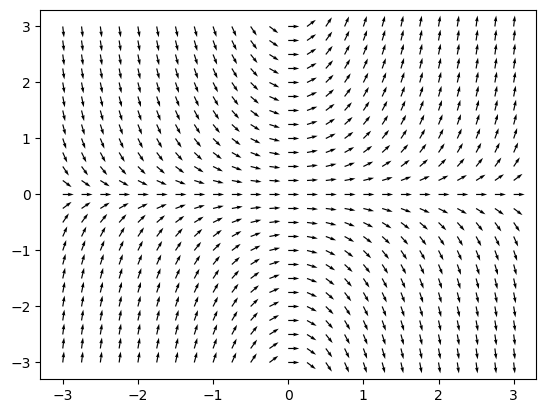

In [72]:
fig, ax = plt.subplots(1, 1)
ax.quiver(X_grid, Y_grid, dx_N, dy_N)
plt.show()

Je kan zelf natellen dat in iedere richting 25 pijlen te zien zijn. Het voordeel aan een dergelijk richtingsveld is dat je de globale vorm van de oplossing er makkelijk op kan aflezen zonder dat je de differentiaalvergelijking moet oplossen.

Je kan ook een kleur geven aan de pijlen, wat meestal gedaan wordt om de grootte van de verandering weer te geven. Hiervoor hebben veel plotcommando's de extra optie `cmap` (wat staat voor colour map). Onderstaande code vat nog eens het hele proces samen en illustreert het gebruik van `cmap`. De parameter `dy` in de functie `quiver` zegt dat we de punten met dezelfde waarde voor `dy` dezelfde kleur moeten geven. De optie `cmap` bepaalt volgens welk kleurenschema we dit moeten doen. Je kan de optie `cmap` weglaten om het standaardschema te gebruiken.

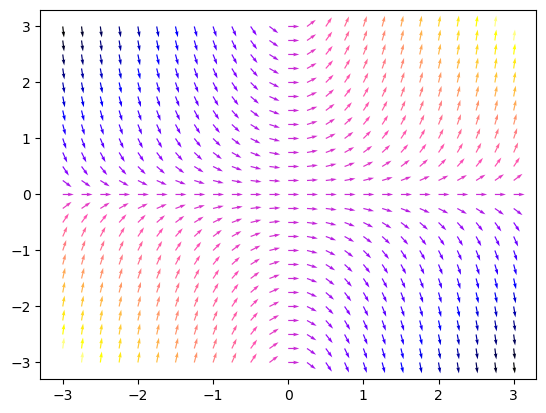

In [73]:
# De toe te passen functie
def rechterlid(x, y):
    return x*y

# Het rooster
x = np.linspace(-3, 3, 25)
y = np.linspace(-3, 3, 25)
X_grid, Y_grid = np.meshgrid(x, y)

# De pijltjes
dx = 1
dy = rechterlid(X_grid, Y_grid)

# Normeren van de pijltjes
lengte = np.sqrt(dx**2 + dy**2)
dx_N = dx/lengte
dy_N = dy/lengte

# Tekenen van de figuur
fig, ax = plt.subplots(1, 1)
ax.quiver(X_grid, Y_grid, dx_N, dy_N, dy, cmap=plt.get_cmap('gnuplot2'))
plt.show()

Als je goed kijkt naar de bovenstaande code, zie je dat deze heel herbruikbaar is. Je moet namelijk enkel de functie `rechterlid` aanpassen en de verdeling van `x` en `y`. De rest van de berekeningen is altijd hetzelfde. Voor meer kleurenschema's kan je kijken naar de [documentatie](http://matplotlib.org/users/colormaps.html) van MatplotLib

Hieronder staat nog eens de code voor bovenstaande plot. We voegen nu een stukje code toe dat (via MatplotLib) de grafiek tekent van de particuliere oplossing die we hierboven berekend hebben. We zullen hier `lambdify` nodig hebben. Op de voorlaatste regel staat het commando `ax.set_ylim([-3,3])`. Dit fixeert de hoogte van het venster zodat we altijd kijken op het gebied $y\in[-3,3]$. Als je deze regel in comment zet, zie je meteen waarom we dit nodig hadden.

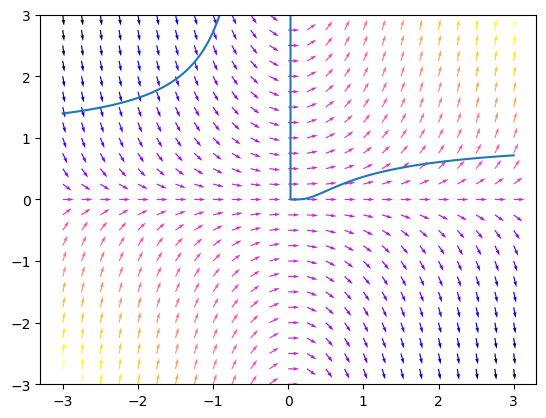

In [74]:
# De toe te passen functie
def rechterlid(x, y):
    return x*y

# Het rooster
x = np.linspace(-3, 3, 25)
y = np.linspace(-3, 3, 25)
X_grid, Y_grid = np.meshgrid(x, y)

# De pijltjes
dx = 1
dy = rechterlid(X_grid, Y_grid)

# Normeren van de pijltjes
lengte = np.sqrt(dx**2 + dy**2)
dx_N = dx/lengte
dy_N = dy/lengte

# Bereik van de oplossing
X = np.linspace(-3, 3, 100)
Y = sp.lambdify(sp.symbols('x'), opl.rhs, "numpy")(X)

# Tekenen van de figuur
fig, ax = plt.subplots(1, 1)
ax.quiver(X_grid, Y_grid, dx_N, dy_N, dy, cmap=plt.get_cmap('gnuplot2'))
ax.plot(X, Y)
ax.set_ylim([-3, 3])
plt.show()

Matplotlib heeft een meer geavanceerde methode om dit soort velden te plotten, met name een *streamplot*.

Het nadeel van `quiver` is dat, als je meer punten laat plotten, de pijlen beginnen te overlappen en het beeld niet duidelijk meer is. Hetzelfde probleem stelt zich voor als je te weinig punten gebruikt. Bij het gebruik van `streamplot` wordt dit enigszins verholpen doordat Matplotlib zelf stroomlijnen doorheen het veld tekent met een bepaalde densiteit. Je kan zelf nog altijd de densiteit veranderen om de duidelijkheid aan te passen.

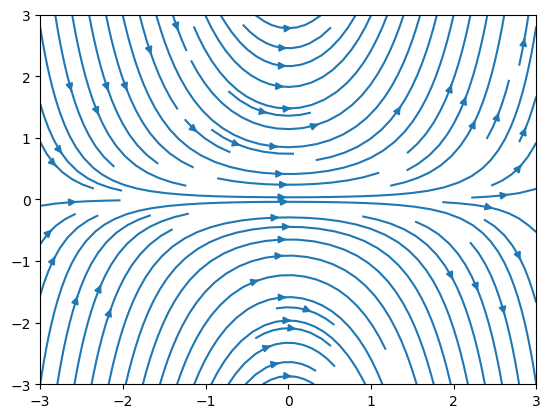

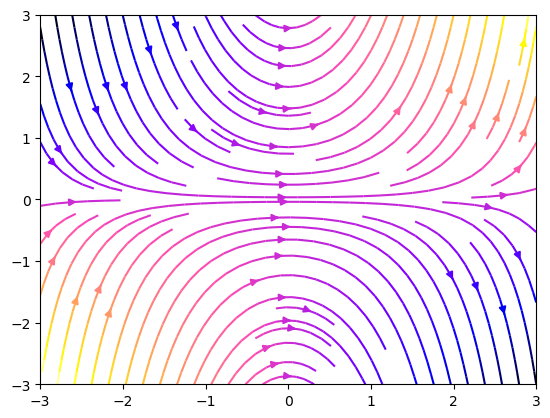

In [75]:
fig, ax = plt.subplots(1, 1)
ax.streamplot(X_grid, Y_grid, dx_N, dy_N)
plt.show()
fig, ax = plt.subplots(1, 1)
ax.streamplot(X_grid, Y_grid, dx_N, dy_N, color=dy, cmap=plt.get_cmap('gnuplot2'))
plt.show()

**Opdracht 2:** Hieronder zijn drie differentiaalvergelijkingen gegeven. Kies er om te beginnen één uit. Schrijf vervolgens code die via Sympy de oplossing van de differentiaalvergelijking berekent met de beginvoorwaarde $y(0)=2$. Tenslotte teken je een streamplot van de differentiaalvergelijking en teken je de particuliere oplossing bij op de streamplot. Dit is een test om te zien of je al het voorgaande doorhebt. 

**Opmerking**: _Probeer eens de differentiaalvergelijking op te stellen zonder eerst `y` en `x` te herdefiniëren als functie en symbool. Wat gebeurt er? Dit is omwille van het feit dat we in de vraag hierboven `x` en `y` gebruikt hebben om het rooster op te stellen. Dit zijn nu niet langer `Sympy` instanties, maar behoren tot `Numpy`! Dit is heel belangrijk in Python: variabelen kunnen op elk moment hergedefinieerd worden. Als je dus errors krijgt zoals hieronder, kijk dan altijd eerst na of je nergens een `Sympy` symbool gebruikt dat niet langer eentje is! Je kan dit eenvoudigweg oplossen door `x` en `y` opnieuw te definiëren als symbool en functie._

1. $$\frac{d}{dx}y(x)=\frac{x}{y(x)}$$
1. $$\frac{d}{dx}y(x)=-xy$$
1. $$\frac{d}{dx}y(x)+2xy=x^3$$

In [95]:
y = sp.Function('y'); x = sp.symbols('x')
vgl1 = sp.Eq(y(x).diff(x), -x*y(x))
opl1 = sp.dsolve(vgl1, y(x))
bvw = {y(0): 2}
sol = sp.dsolve(dfvgl, y(x), ics=bvw)
sol

Eq(y(x), 2*exp(x**2/2))

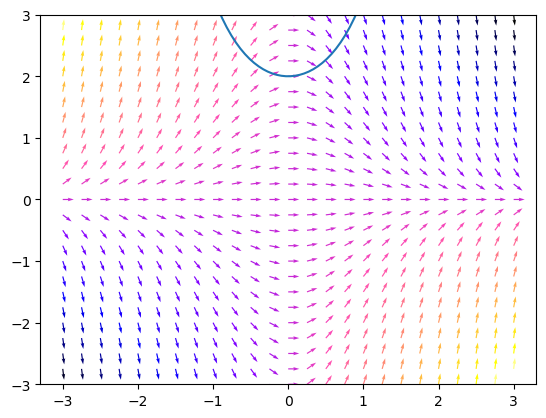

In [92]:
# De toe te passen functie
def rechterlid(x, y):
    return -x*y

# Het rooster
x = np.linspace(-3, 3, 25)
y = np.linspace(-3, 3, 25)
X_grid, Y_grid = np.meshgrid(x, y)

# De pijltjes
dx = 1
dy = rechterlid(X_grid, Y_grid)

# Normeren van de pijltjes
lengte = np.sqrt(dx**2 + dy**2)
dx_N = dx/lengte
dy_N = dy/lengte

# Bereik van de oplossing
X = np.linspace(-3, 3, 100)
Y = sp.lambdify(sp.symbols('x'), sol.rhs, "numpy")(X)

# Tekenen van de figuur
fig, ax = plt.subplots(1, 1)
ax.quiver(X_grid, Y_grid, dx_N, dy_N, dy, cmap=plt.get_cmap('gnuplot2'))
ax.plot(X, Y)
ax.set_ylim([-3, 3])
plt.show()

Het kan voorvallen dat Sympy niet meteen een oplossing vindt voor een differentiaalvergelijking. In dat geval geeft `dsolve` een afgekapte Taylorexpansie van de oplossing terug zoals in het volgende voorbeeld.

In [96]:
dfvgl = sp.Eq(sp.Derivative(y(x), x), 1/(1+x**2)-2*y(x)**2)
sol = sp.dsolve(dfvgl)
display(sol)

Eq(y(x), (3*x**5*atan(x) + 3*x**4 + 6*x**3*atan(x) + 7*x**2 + 3*x*atan(x) + 2)/(3*x**6*atan(x) + 3*x**5 + 9*x**4*atan(x) + 8*x**3 + 9*x**2*atan(x) + 5*x + 3*atan(x)))

**Opdracht 3:** Een voorwerp valt onder invloed van de zwaartekracht en ondervindt ook een weerstand van de lucht. We modelleren de weerstand als lineair aan de snelheid: $$m\frac{dv(t)}{dt}=mg-\gamma v(t)$$

Bereken, voor $\gamma=2$ kg/s, $m=10$ kg en $g=9.81$ m/s$^2$ en $v(0)=-10$, $20$, $30$, $70$ en $90$ m/s de particuliere oplossing. Plot al deze oplossingen samen op dezelfde grafiek. Je moet het richtingsveld niet tekenen.

Beschrijf het verloop van $v(t)$. Klopt dit met je intuïtie en wat je weet over vallende voorwerpen (hier met luchtweerstand)?

## Hogere orde differentiaalvergelijkingen

Sympy kan via dezelfde syntax om met hogere orde afgeleiden. In het commando Derivative kan je een derde argument meegeven dat de orde encodeert.

In [97]:
dfvgl = sp.Eq(sp.Derivative(y(x), x, 2) - 8*sp.Derivative(y(x), x)+145*y(x), 0)
display(dfvgl)

Eq(145*y(x) - 8*Derivative(y(x), x) + Derivative(y(x), (x, 2)), 0)

**Opdracht 4:** Bepaal de oplossing van 
$$\frac{d^2}{dx^2}y(x)+\frac{d}{dx}y(x)-2y(x)=0$$ 
met randvoorwaarden $y(0)=1$ en $y'(0)=-2$ en maak er een grafiek van. Verander nu de eerste randvoorwaarde in $y(0)=0.99$. Wat gebeurt er, en waarom?

In [120]:
dfvgl = sp.Eq(y(x).diff(x, 2)+y(x).diff(x)-2*y(x), 0)

bgv = {y(0): 0.99, y(x).diff(x).subs(x,0): -2}
dfopl = sp.dsolve(dfvgl, y(x), ics=bgv)
dfopl

Eq(y(x), -0.00666666666666667*exp(x) + 0.996666666666667*exp(-2*x))